# IRIS - Connection II

![Add layer](https://github.com/DrKAI/image/blob/main/Add%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기
* iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [2]:
data = load_iris()

In [4]:
X = data.data
y = data.target

X = pd.DataFrame(X, columns=data.feature_names)

## train set, test set 구분하기

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2022)

## **sepal끼리, petal끼리**

In [8]:
X_train_s = X_train.filter(like='sepal')
X_train_p = X_train.filter(like='petal')

## One-hot Encoding

In [10]:
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)

## Modeling : multi-input & Add layer

In [38]:
# model clear
keras.backend.clear_session()

# make layers
il_s = keras.layers.Input(shape=X_train_s.shape[1:])
hl_s = keras.layers.Dense(4, activation='relu')(il_s)

il_p = keras.layers.Input(shape=X_train_p.shape[1:])
hl_p = keras.layers.Dense(4, activation='relu')(il_p)

cl = keras.layers.Add()([hl_s, hl_p])
ol = keras.layers.Dense(3, activation='softmax')(cl)

model = keras.models.Model([il_s, il_p], ol)

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 4)            12          input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 4)            12          input_2[0][0]                    
_______________________________________________________________________________________

## 모델 시각화

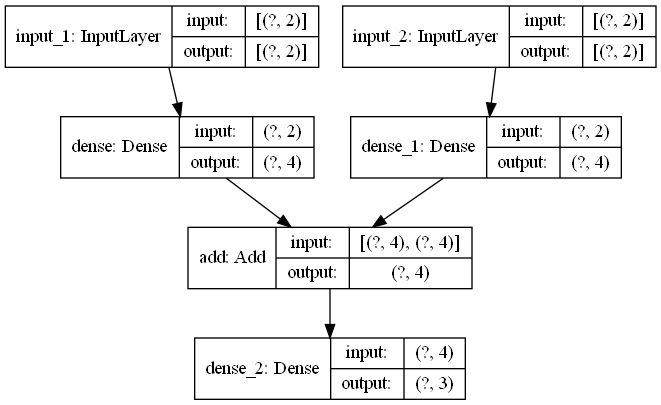

In [39]:
keras.utils.plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [40]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=5,
                                   min_delta=0, restore_best_weights=True)

In [41]:
model.fit([X_train_s, X_train_p], y_train, verbose=1, epochs=1000,
          validation_split=.2,
          callbacks=[es],)

Epoch 1/1000
3/3 [==============================] - 0s 32ms/step - loss: 2.1532 - accuracy: 0.3333 - val_loss: 2.3462 - val_accuracy: 0.2083
Epoch 2/1000
3/3 [==============================] - 0s 6ms/step - loss: 2.0989 - accuracy: 0.3333 - val_loss: 2.2845 - val_accuracy: 0.2083
Epoch 3/1000
3/3 [==============================] - 0s 6ms/step - loss: 2.0456 - accuracy: 0.3333 - val_loss: 2.2248 - val_accuracy: 0.2083
Epoch 4/1000
3/3 [==============================] - 0s 8ms/step - loss: 1.9942 - accuracy: 0.3333 - val_loss: 2.1671 - val_accuracy: 0.2083
Epoch 5/1000
3/3 [==============================] - 0s 6ms/step - loss: 1.9440 - accuracy: 0.3333 - val_loss: 2.1118 - val_accuracy: 0.2083
Epoch 6/1000
3/3 [==============================] - 0s 6ms/step - loss: 1.8974 - accuracy: 0.3333 - val_loss: 2.0584 - val_accuracy: 0.2083
Epoch 7/1000
3/3 [==============================] - 0s 6ms/step - loss: 1.8506 - accuracy: 0.3333 - val_loss: 2.0071 - val_accuracy: 0.2083
Epoch 8/1000
3/3 [=

In [43]:
model.evaluate([X_test.filter(like='sepal'), X_test.filter(like='petal')], y_test)

1/1 [==============================] - 0s 0s/step - loss: 0.1399 - accuracy: 0.9000


[0.13985443115234375, 0.8999999761581421]